1. a)

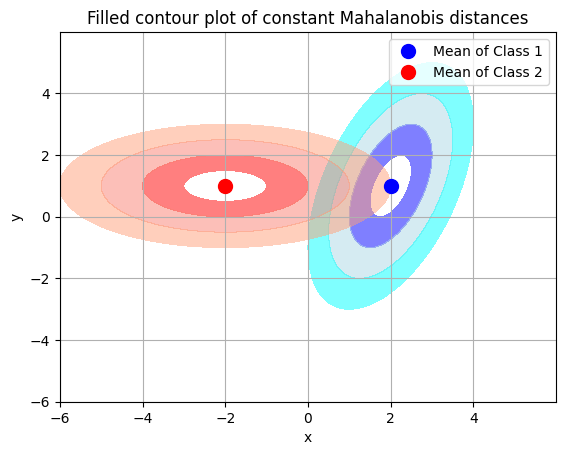

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Class means and covariance matrices
m1 = np.array([2, 1])
m2 = np.array([-2, 1])
Sigma1 = np.array([[1, -1], [-1, 4]])
Sigma2 = np.array([[4, 0], [0, 1]])

# Values of B^2
B_squared_values = np.array([0.25, 1, 2.25, 4])

# Create a grid of points
x, y = np.mgrid[-6:6:.01, -6:6:.01]
pos = np.dstack((x, y))

# Calculate the PDF of the multivariate Gaussian for each class
rv1 = multivariate_normal(m1, Sigma1)
rv2 = multivariate_normal(m2, Sigma2)
pdf1 = rv1.pdf(pos)
pdf2 = rv2.pdf(pos)
priors = [(0.5, 0.5), (0.3, 0.7), (0.1, 0.9)]

# Calculate the Mahalanobis distance for each point on the grid
# We will use the formula: dM(x, m) = sqrt((x - m)' * Sigma_inv * (x - m))
# This will be equivalent to using the level curves of the bivariate Gaussian distribution.
# Level curves for Gaussian distributions are given by the equation: (x - m)' * Sigma_inv * (x - m) = c
# where c is a constant that will correspond to our B^2 values.
Sigma1_inv = np.linalg.inv(Sigma1)
Sigma2_inv = np.linalg.inv(Sigma2)

# Calculate Mahalanobis distance squared from the means for each point on the grid
mahal1_sq = ((x - m1[0])**2 * Sigma1_inv[0, 0] + 
             (y - m1[1])**2 * Sigma1_inv[1, 1] - 
             2 * (x - m1[0]) * (y - m1[1]) * Sigma1_inv[0, 1])
mahal2_sq = ((x - m2[0])**2 * Sigma2_inv[0, 0] + 
             (y - m2[1])**2 * Sigma2_inv[1, 1] - 
             2 * (x - m2[0]) * (y - m2[1]) * Sigma2_inv[0, 1])

# Plotting the filled contour for class 1
fig, ax = plt.subplots()
CS1 = ax.contourf(x, y, mahal1_sq, levels=B_squared_values, colors=['blue', 'lightblue', 'aqua', 'paleturquoise'], alpha=0.5)
CS2 = ax.contourf(x, y, mahal2_sq, levels=B_squared_values, colors=['red', 'salmon', 'lightsalmon', 'peachpuff'], alpha=0.5)

# Plot class means
ax.plot(m1[0], m1[1], 'bo', markersize=10, label='Mean of Class 1')
ax.plot(m2[0], m2[1], 'ro', markersize=10, label='Mean of Class 2')

# Labels and legend
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Filled contour plot of constant Mahalanobis distances')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


1. C)

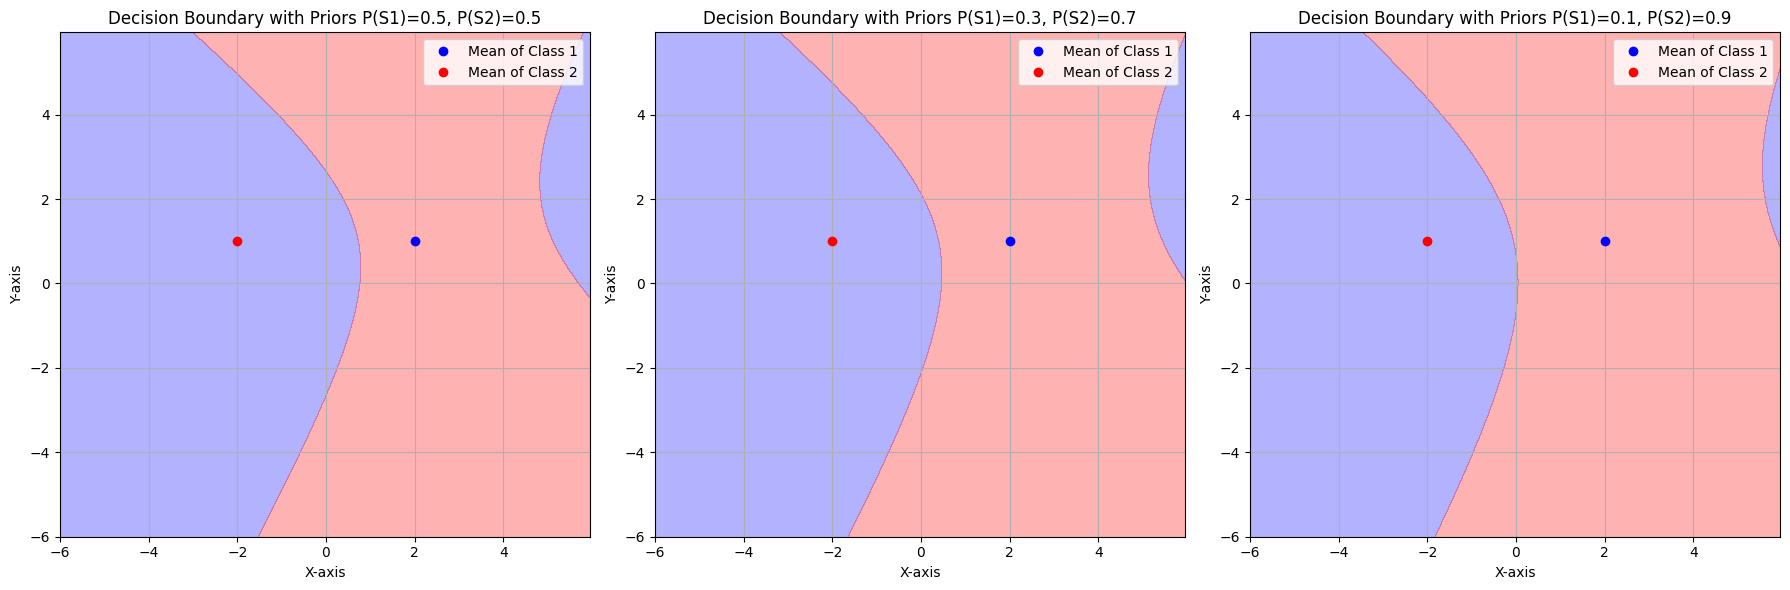

In [6]:
# Correct the decision boundary function to handle the matrix operations correctly
def decision_boundary(x, y, mean1, cov1, mean2, cov2, prior1, prior2):
    inv_cov1 = np.linalg.inv(cov1)
    inv_cov2 = np.linalg.inv(cov2)
    
    # Create a position matrix with the points
    pos = np.dstack((x, y))
    
    # Calculate the Mahalanobis distance term for each distribution
    diff1 = pos - mean1
    diff2 = pos - mean2
    term1 = np.einsum('...k,kl,...l->...', diff1, inv_cov1, diff1)
    term2 = np.einsum('...k,kl,...l->...', diff2, inv_cov2, diff2)
    
    # Calculate the decision boundary
    boundary = term2 - term1 + np.log(np.linalg.det(cov2) / np.linalg.det(cov1)) + 2 * np.log(prior2 / prior1)
    
    return boundary

# Generate decision boundaries for each case
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Compute the decision boundary grid values
x, y = np.mgrid[-6:6:.05, -6:6:.05]
pos = np.dstack((x, y))

# Plot the decision regions and boundaries
for idx, (P1, P2) in enumerate(priors):
    ax = axes[idx]
    
    # Calculate the decision boundary for the current priors
    Z = decision_boundary(x, y, m1, Sigma1, m2, Sigma2, P1, P2)
    
    # Plot the filled contours for the decision regions
    contour = ax.contourf(x, y, Z, levels=0, colors=['blue', 'red'], alpha=0.3)
    
    # Plot the class means
    ax.plot(m1[0], m1[1], 'bo', label='Mean of Class 1')  # Class mean 1
    ax.plot(m2[0], m2[1], 'ro', label='Mean of Class 2')  # Class mean 2

    # Title and labels
    ax.set_title(f'Decision Boundary with Priors P(S1)={P1}, P(S2)={P2}')
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()


1. d)

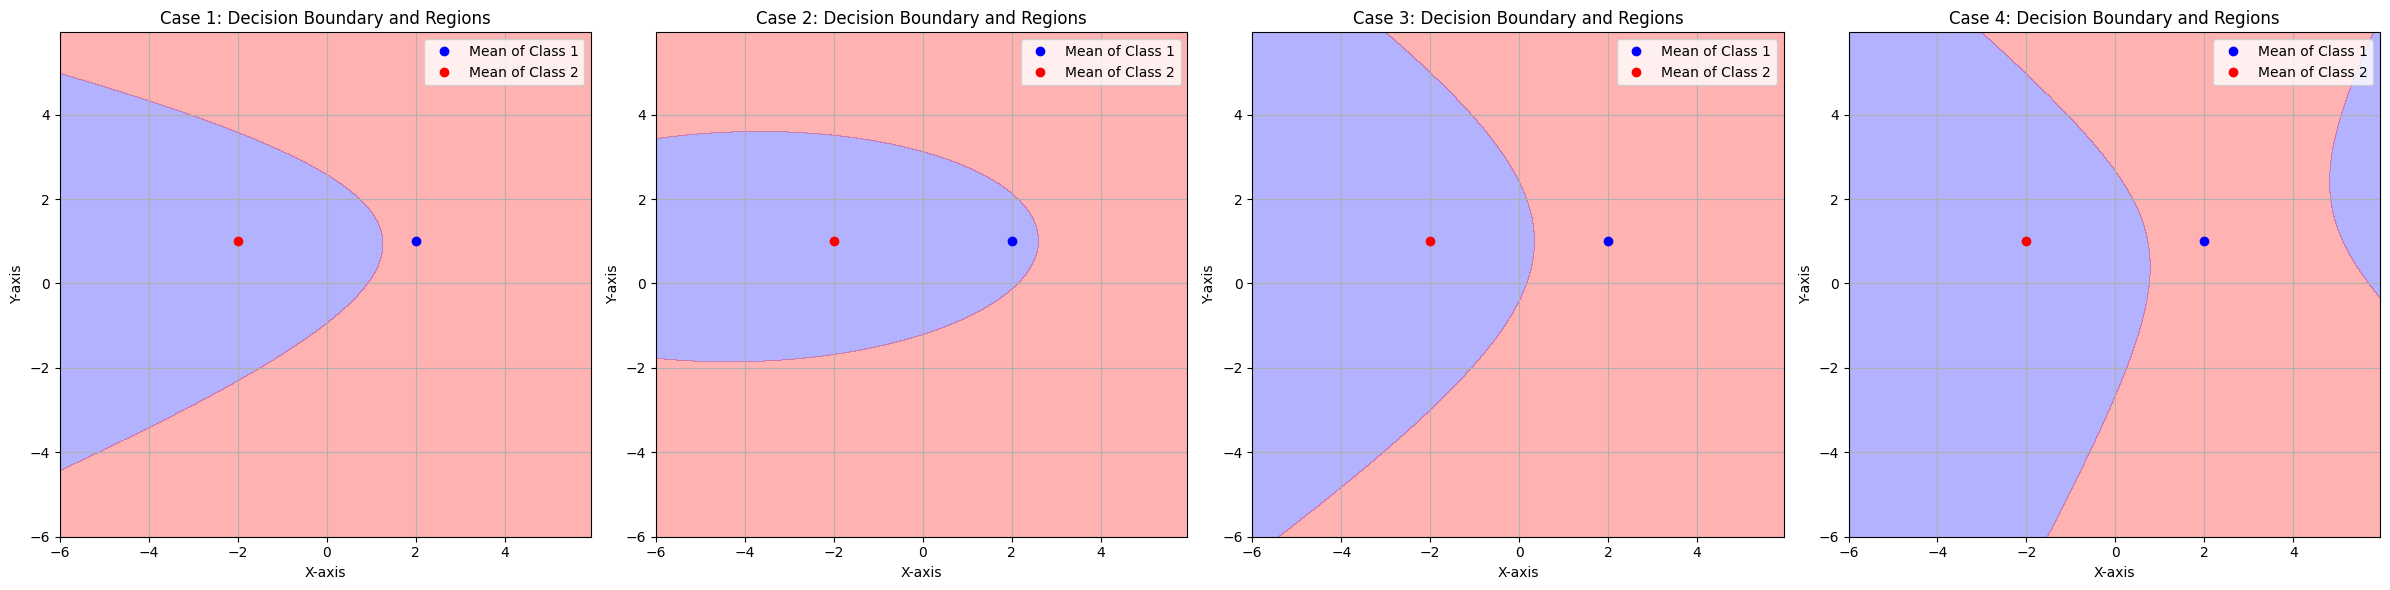

In [8]:
# Covariance matrices for the four cases
Sigma1_cases = [
    4 * np.array([[1, -1], [-1, 4]]),   # Case (i)
    16 * np.array([[1, -1], [-1, 4]]),  # Case (ii)
    np.array([[2, 0], [0, 2]]),         # Case (iii)
    np.array([[1, -1], [-1, 4]])        # Case (iv)
]
Sigma2_cases = [Sigma2] * 4  # All cases have the same Sigma2 as given in part (a)

# Priors from case (c)(i)
P1, P2 = priors[0]

# Generate decision boundaries and regions for each case
fig, axes = plt.subplots(1, 4, figsize=(24, 6))

# Plot the decision regions and boundaries for each covariance matrix case
for idx, (Sigma1_case, Sigma2_case) in enumerate(zip(Sigma1_cases, Sigma2_cases)):
    ax = axes[idx]
    Z = decision_boundary(x, y, m1, Sigma1_case, m2, Sigma2_case, P1, P2)

    # Plot the filled contours for the decision regions
    ax.contourf(x, y, Z, levels=0, colors=['blue', 'red'], alpha=0.3)

    # Plot the class means
    ax.plot(m1[0], m1[1], 'bo', label='Mean of Class 1')  # Class mean 1
    ax.plot(m2[0], m2[1], 'ro', label='Mean of Class 2')  # Class mean 2

    # Title and labels
    ax.set_title(f'Case {idx + 1}: Decision Boundary and Regions')
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()
